## Classificação de variáveis

### Importando as bibliotecas 

In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from slugify import slugify

In [3]:
df_firstn = pd.read_csv("../data/raw/Iowa_Liquor_Sales.csv", nrows=1)
df_firstn

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S29198800001,11/20/2015,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56,Lee,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,6,$162.84,4.5,1.19


## Análise exploratória dataset Iowa_Liquor_Sales

### Escolha das colunas do dataset para a análise exploratória

In [6]:
req_cols=['Date','City','County','Item Description','State Bottle Cost','State Bottle Retail','Volume Sold (Liters)']

### Criação do dataframe df contendo as colunas selecionadas previamente através da lista req_cols. Isso diminui bastante o dataset e possibilita a sua análise

In [5]:
df = pd.read_csv("../data/raw/Iowa_Liquor_Sales.csv", usecols=req_cols)

In [7]:
df.columns = [slugify(col, lowercase=True, separator='_') for col in df.columns]
df.columns

Index(['date', 'city', 'county', 'item_description', 'state_bottle_cost',
       'state_bottle_retail', 'volume_sold_liters'],
      dtype='object')

In [8]:
#df['city'] = slugify(str(df['city']))

### Eliminamos os valores NaN da tabela para diminuir o tamanho do dataset

In [9]:
df.isnull().values.any()

True

In [10]:
for x in df.columns:
    df[x] = df[x].fillna(0)

In [11]:
df.isnull().values.any()

False

### Padronizando os nomes de condados, cidades e descrição de itens

In [12]:
df['county'] = df['county'].str.upper()

In [13]:
df['city'] = df['city'].str.upper()

In [14]:
df['item_description'] = df['item_description'].str.upper()

#### Verificando quantidade de cidades e condados:

In [15]:
cities = df['city'].unique()

In [16]:
cities

array(['KEOKUK', 'CLARINDA', 'FORT MADISON', 'IOWA CITY', 'TOLEDO',
       'HOLSTEIN', 'WATERLOO', 'MUSCATINE', 'DUNLAP', 'SHELDON',
       'DES MOINES', 'ATLANTIC', 'CLINTON', 'DUBUQUE', 'CEDAR FALLS',
       'DENISON', 'ONAWA', 'WAUKEE', 'LE CLAIRE', 'PELLA', 'ALTOONA',
       'MOUNT PLEASANT', 'OSKALOOSA', 'BANCROFT', 'HARLAN', 'ANKENY',
       'IOWA FALLS', 'WAVERLY', 'CEDAR RAPIDS', 'SIOUX CITY', 'NEWTON',
       'MARSHALLTOWN', 'SHENANDOAH', 'MOUNT AYR', 'COUNCIL BLUFFS',
       'WASHINGTON', 'DAVENPORT', 'KNOXVILLE', 'FORT DODGE',
       'INDEPENDENCE', 'MISSOURI VALLEY', 'CRESCO', 'WEST DES MOINES',
       'ESTHERVILLE', 'COON RAPIDS', 'AMES', 'PLEASANT HILL',
       'MASON CITY', 'RED OAK', 'SPENCER', 'BURLINGTON', 'GUTHRIE CENTER',
       'ANAMOSA', 'CHARITON', 'SPIRIT LAKE', 'BETTENDORF', 'MILFORD',
       'DECORAH', 'GRIMES', 'PARKERSBURG', 'NEVADA', 'EAGLE GROVE',
       'LECLAIRE', 'CLEAR LAKE', 'ARNOLDS PARK', 'WILTON', 'JOHNSTON',
       'TIPTON', 'NORTH LIBERTY', 'MAPL

In [17]:
len(cities)

417

In [18]:
county = df['county'].unique()

In [19]:
county

array(['LEE', 'PAGE', 'JOHNSON', 'TAMA', 'IDA', 'BLACK HAWK', 'MUSCATINE',
       'HARRISON', "O'BRIEN", 'POLK', 'CASS', 'CLINTON', 'DUBUQUE',
       'CRAWFORD', 'MONONA', 'DALLAS', 'SCOTT', 'MARION', 'HENRY',
       'BUCHANAN', 'KOSSUTH', 'SHELBY', 'HARDIN', 'BREMER', 'LINN',
       'WOODBURY', 'JASPER', 'MARSHALL', 'RINGGOLD', 'POTTAWATTAMIE',
       'WASHINGTON', 'WEBSTER', 'HOWARD', 'EMMET', 'CARROLL', 'STORY',
       'CERRO GORDO', 'MONTGOMERY', 'CLAY', 'DES MOINES', 'GUTHRIE',
       'JONES', 'LUCAS', 'DICKINSON', 'MAHASKA', 'WINNESHIEK', 'BUTLER',
       'WRIGHT', 'CEDAR', 'IOWA', 'OSCEOLA', 'WINNEBAGO', 'GRUNDY',
       'LOUISA', 'PLYMOUTH', 'SIOUX', 'PALO ALTO', 'JACKSON',
       'BUENA VISTA', 'FLOYD', 'HUMBOLDT', 'UNION', 'CLAYTON', 'WARREN',
       'GREENE', 'WAPELLO', 'LYON', 'SAC', 'MADISON', 'TAYLOR', 'CALHOUN',
       'HANCOCK', 'DELAWARE', 'FAYETTE', 'CHICKASAW', 'JEFFERSON',
       'BENTON', 'POWESHIEK', 'CHEROKEE', 'FRANKLIN', 'CLARKE',
       'HAMILTON', 'KEOKUK', '

In [20]:
len(county)

104

In [21]:
description = df['item_description'].unique()

In [22]:
len(description)

5819

### Parece que precisaremos realizar algum tipo de transformação nesses dados. Pode-se perceber que às vezes o nome da cidade ou condado aparece com nome maiúsculo e às vezes minusculo. por via das dúvidas iremos fazer isso com a descrição do item também. Isso influencia de alguma forma nossa análise.

### Temos também um problema com os condados de O'BRIEN e CERRO GORDO, pois algumas vezes ele aparece com ou sem a aspa simples

### Qual condado "OBRIEN" tem mais entradas? OBRIEN ou O'BRIEN?:

In [23]:
df['county'].shape

(12591077,)

In [24]:
test1 = df[df['county']=="OBRIEN"]
test1.shape

(19819, 7)

In [25]:
test1

,date,city,county,item_description,state_bottle_cost,state_bottle_retail,volume_sold_liters
9712544,08/29/2016,SANBORN,OBRIEN,CAPTAIN MORGAN SPICED RUM,$11.75,$17.63,6.00
9712824,08/29/2016,PAULLINA,OBRIEN,BLACK VELVET,$5.23,$7.85,0.75
9712825,08/29/2016,PAULLINA,OBRIEN,BLACK VELVET,$9.70,$14.93,3.50
9712826,08/29/2016,PAULLINA,OBRIEN,SEAGRAMS 7 CROWN BL WHISKEY,$3.50,$5.25,1.12
9712827,08/29/2016,PAULLINA,OBRIEN,ABSOLUT SWEDISH VODKA 80 PRF,$11.49,$17.24,2.25
...,...,...,...,...,...,...,...
12591072,10/31/2017,SHELDON,OBRIEN,FRAPPACHATA ICED COFFEE BLEND,$8.00,$12.00,2.40
12591073,10/31/2017,SHELDON,OBRIEN,OLD FORESTER STATESMAN,$27.48,$41.22,1.50
12591074,10/31/2017,SHELDON,OBRIEN,OLD FORESTER 1897 WHISKY ROW SERIES,$24.98,$37.47,1.50
12591075,10/31/2017,SHELDON,OBRIEN,OLD FORESTER 1870 WHISKY ROW SERIES,$22.49,$33.74,1.50


In [26]:
test2 = df[df['county']=="O'BRIEN"]
test2.shape

(63224, 7)

In [27]:
test2

,date,city,county,item_description,state_bottle_cost,state_bottle_retail,volume_sold_liters
10,11/17/2015,SHELDON,O'BRIEN,DISARONNO AMARETTO CAVALLI MIGNON 3-50ML PACK,$6.40,$9.60,3.00
46,11/10/2015,SHELDON,O'BRIEN,KNOB CREEK W/ CRYSTAL DECANTER,$35.55,$53.34,5.25
94,11/21/2015,SHELDON,O'BRIEN,TEMPLETON RYE W/FLASK,$18.09,$27.14,4.50
359,02/08/2012,SHELDON,O'BRIEN,CROWN ROYAL SPECIAL RESERVE,$24.30,$36.44,2.25
607,06/30/2014,SHELDON,O'BRIEN,FIREBALL CINNAMON WHISKY,$5.33,$8.00,1.50
...,...,...,...,...,...,...,...
9879034,08/22/2016,HARTLEY,O'BRIEN,SOUTHERN COMFORT,$12.97,$19.46,2.00
9881228,08/22/2016,SHELDON,O'BRIEN,WOODFORD RESERVE BOURBON,$21.99,$32.99,0.75
9881229,08/22/2016,SHELDON,O'BRIEN,PARAMOUNT BLACKBERRY BRANDY,$11.29,$16.94,10.50
9881230,08/22/2016,SHELDON,O'BRIEN,ABSOLUT SWEDISH VODKA 80 PRF,$19.99,$29.99,1.75


In [28]:
df[df['county']=="OBRIEN"]="O'BRIEN"

In [1]:
test3 = df[df['county']=="OBRIEN"]
test3

NameError: name 'df' is not defined

In [18]:
df['county'].shape

(12511889,)

In [19]:
df.tail(1)

,date,city,county,item_description,state_bottle_cost,state_bottle_retail,volume_sold_liters
12591076,O'BRIEN,O'BRIEN,O'BRIEN,O'BRIEN,O'BRIEN,O'BRIEN,O'BRIEN


In [57]:
cg = df[df['county']=="CERRO GORD"]

In [58]:
cg

,date,city,county,item_description,state_bottle_cost,state_bottle_retail,volume_sold_liters
9914648,09/01/2016,CLEAR LAKE,CERRO GORD,TITOS VODKA,$9.64,$14.46,0.75
9914649,09/01/2016,CLEAR LAKE,CERRO GORD,GREY GOOSE VODKA,$18.49,$27.74,3.00
9914650,09/01/2016,CLEAR LAKE,CERRO GORD,SMIRNOFF VODKA 8...,$8.25,$12.38,0.75
9914651,09/01/2016,CLEAR LAKE,CERRO GORD,NEW AMSTERDAM PEACH,$6.90,$10.35,0.75
9914652,09/01/2016,CLEAR LAKE,CERRO GORD,NEW AMSTERDAM VODKA,$13.32,$19.98,1.75
...,...,...,...,...,...,...,...
12561465,10/26/2017,MASON CITY,CERRO GORD,JAGERMEISTER LIQ...,$6.52,$9.78,1.12
12561466,10/26/2017,MASON CITY,CERRO GORD,CROWN ROYAL REGA...,$8.00,$12.00,1.12
12561467,10/26/2017,MASON CITY,CERRO GORD,CROWN ROYAL CANA...,$8.00,$12.00,0.75
12561468,10/26/2017,MASON CITY,CERRO GORD,PAUL MASSON GRAN...,$3.22,$4.83,2.25


In [59]:
df[df['county']=="CERRO GORD"]="CERRO GORDO"

In [1]:
cg2 = df[df['county']=="CERRO GORD"]
cg2

NameError: name 'df' is not defined

### Vamos retirar os cifrões do preço de custo e do preço de venda para facilitar futuras operações com esses números :

In [2]:
df['state_bottle_cost'] = df['state_bottle_cost'].replace({'\$':''}, regex = True)

NameError: name 'df' is not defined

In [21]:
df['state_bottle_retail'] = df['state_bottle_retail'].replace({'\$':''}, regex = True)

## Explorando o dataset:

#### Verificando formato dos dados:

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12591077 entries, 0 to 12591076
Data columns (total 7 columns):
 #   Column               Dtype  
---  ------               -----  
 0   date                 object 
 1   city                 object 
 2   county               object 
 3   item_description     object 
 4   state_bottle_cost    object 
 5   state_bottle_retail  object 
 6   volume_sold_liters   float64
dtypes: float64(1), object(6)
memory usage: 672.4+ MB


#### Usando float16 para economizar memoria(float16 = máximo 32767):

In [59]:
df['volume_sold_liters'].max()

15000.0

In [60]:
df['volume_sold_liters'].min()

0.0

In [57]:
df['volume_sold_liters'] = np.float16(df['volume_sold_liters'])

#### Transformando o os dados da coluna Date em formato datetime

In [49]:
df['date'] = pd.to_datetime(df['date'])

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12591077 entries, 0 to 12591076
Data columns (total 7 columns):
 #   Column               Dtype         
---  ------               -----         
 0   date                 datetime64[ns]
 1   city                 object        
 2   county               object        
 3   item_description     object        
 4   state_bottle_cost    object        
 5   state_bottle_retail  object        
 6   volume_sold_liters   float16       
dtypes: datetime64[ns](1), float16(1), object(5)
memory usage: 600.4+ MB


In [61]:
df.tail(1)

,date,city,county,item_description,state_bottle_cost,state_bottle_retail,volume_sold_liters
12591076,2017-10-31,<pandas.core.strings.StringMethods object at 0x7faf85090650>,OBRIEN,Sugarlands Shine Peanut Butter & Jelly Moonshine,$13.00,$19.50,1.5


In [72]:
df.head(1)

,date,city,county,item_description,state_bottle_cost,state_bottle_retail,volume_sold_liters
0,2015-11-20,<pandas.core.strings.StringMethods object at 0x7faf85090650>,Lee,Templeton Rye w/Flask,$18.09,$27.14,4.5


In [71]:
df.tail(1)

,date,city,county,item_description,state_bottle_cost,state_bottle_retail,volume_sold_liters
12591076,2017-10-31,<pandas.core.strings.StringMethods object at 0x7faf85090650>,OBRIEN,Sugarlands Shine Peanut Butter & Jelly Moonshine,$13.00,$19.50,1.5


### Em qual condado se vendeu mais?

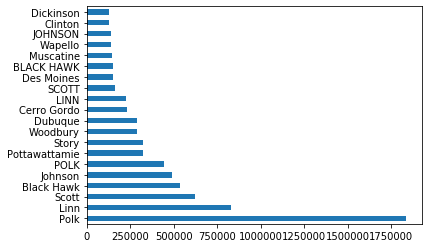

In [28]:
county_sales = df['county'].value_counts().nlargest(20)
county_sales.plot(kind="barh")

### Sabendo que o condado de POLK foi o que vendeu mais, quais cidades do condado de POLK venderam mais?

#### Filtrando as cidades do condado de POLK

In [ ]:
polk = df[df['County']=='POLK']
polk.head()

#### Quais cidades há no condado de POLK?

In [ ]:
polk['City'].unique()

#### Em quais cidade do condado de POLK se vendeu mais bebida?

In [ ]:
polk['City'].value_counts().plot(kind="barh")

#### Quais cidades no estado do IOWA venderam mais bebida?

In [ ]:
city_sales = df['City'].value_counts().nlargest(20)
city_sales.plot(kind="barh")

#### Filtrando os dados por ano

In [ ]:
year_2012 = df[df['Date'].dt.year == 2012]
year_2012.head()

In [ ]:
year_2013 = df[df['Date'].dt.year == 2013]
year_2013.head()

In [ ]:
year_2014 = df[df['Date'].dt.year == 2014]
year_2014.head()

In [ ]:
year_2015 = df[df['Date'].dt.year == 2015]
year_2015.head()

In [ ]:
year_2016 = df[df['Date'].dt.year == 2016]
year_2016.head()

In [ ]:
year_2017 = df[df['Date'].dt.year == 2017]
year_2017.head()

In [ ]:
year = [2012,2013,2014,2015,2016,2017]
qtt = []
qtt.append(len(year_2012.index))
qtt.append(len(year_2013.index))
qtt.append(len(year_2014.index))
qtt.append(len(year_2015.index))
qtt.append(len(year_2016.index))
qtt.append(len(year_2017.index))
qtt

In [ ]:
plt.grid(True)
plt.plot(year, qtt)

In [ ]:
year = [2012,2013,2014,2015,2016]
qtt = []
qtt.append(len(year_2012.index))
qtt.append(len(year_2013.index))
qtt.append(len(year_2014.index))
qtt.append(len(year_2015.index))
qtt.append(len(year_2016.index))
qtt

In [ ]:
plt.plot(year, qtt)

In [ ]:
volume_per_month_2012 = year_2012['Date']

In [ ]:
volume_per_month_2013 = year_2013['Date']

In [ ]:
volume_per_month_2014 = year_2014['Date']

In [ ]:
volume_per_month_2015 = year_2015['Date']

In [ ]:
volume_per_month_2016 = year_2016['Date']

In [ ]:
volume_per_month_2017 = year_2017['Date']

In [ ]:
volume_per_month_2012.groupby(volume_per_month_2012.dt.month).count().plot.line()

In [ ]:
volume_per_month_2013.groupby(volume_per_month_2013.dt.month).count().plot.line()

In [ ]:
volume_per_month_2014.groupby(volume_per_month_2014.dt.month).count().plot.line()

In [ ]:
volume_per_month_2015.groupby(volume_per_month_2015.dt.month).count().plot.line()

In [ ]:
volume_per_month_2016.groupby(volume_per_month_2016.dt.month).count().plot.line()

In [ ]:
volume_per_month_2017.groupby(volume_per_month_2017.dt.month).count().plot.line()